## 1
    Представьте собственные данные и постройте эктраполяцию полиномами
    первой, второй и третьей степени

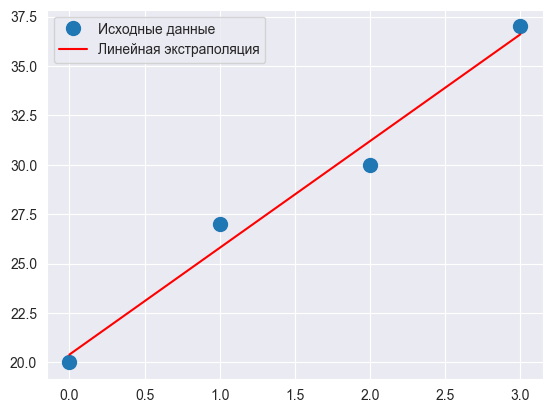

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

x = np.array([0, 1, 2, 3])
y = np.array([20, 27, 30, 37])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

[-6.09889046 -5.20495852 -4.31715692 -3.29483278 -2.28153545 -1.38287223
  0.41195033  0.91534901  2.38310292  3.14309513  4.00121282  4.56594103
  6.06335489]
[35.75634813 25.05314245 16.26480947  9.39121151  3.87131743  1.13455857
 -0.43160962  0.98652752  4.05523879  8.85412133 16.44251376 25.18759211
 35.6942016 ]


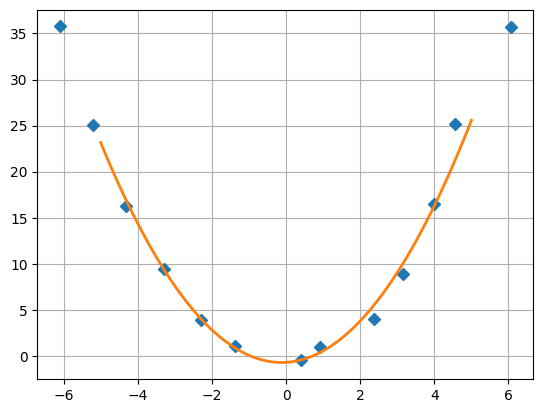

In [16]:
delta = 1.0
x = np.linspace(-6, 6, 13)
y = x ** 2 + delta*(rand(13)-0.5)
x += delta*(rand(13)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = np.vstack((x**2, x, np.ones(13))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

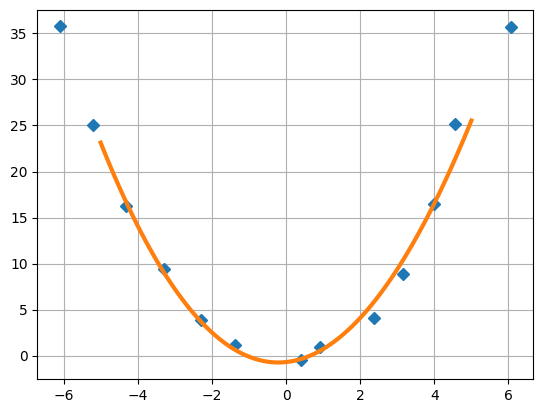

In [17]:
m = np.vstack((x**3, x**2, x, np.ones(13))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

## 2
    Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

[2.00239393 5.        ]
0.0001093578514421147
2.278479251377268


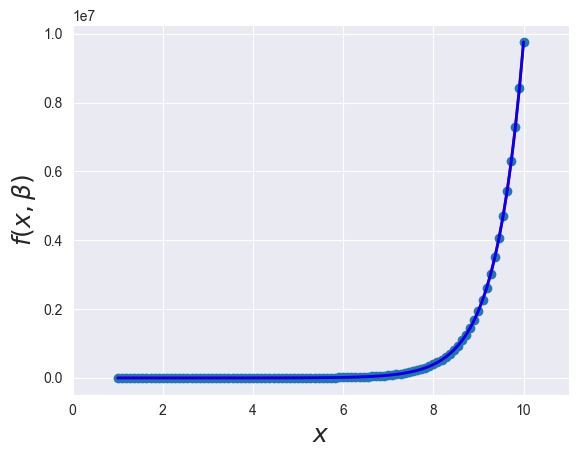

In [7]:
import scipy as sp

beta = (2, 5)
def f(x, b0, b1):
    return b0 * np.log(x) + b1 ** x


xdata = np.linspace(1, 10, 100)

y = f(xdata, *beta)

ydata = y + 0.15 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 3
    Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
    (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
    Найдите коэффициенты линии регрессии. Постройте прогноз

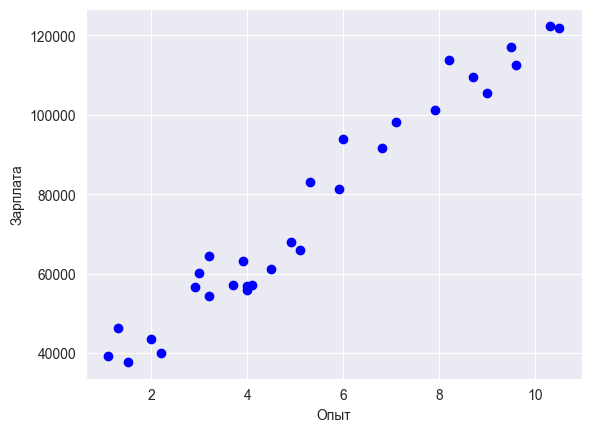

26780.09915062818
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


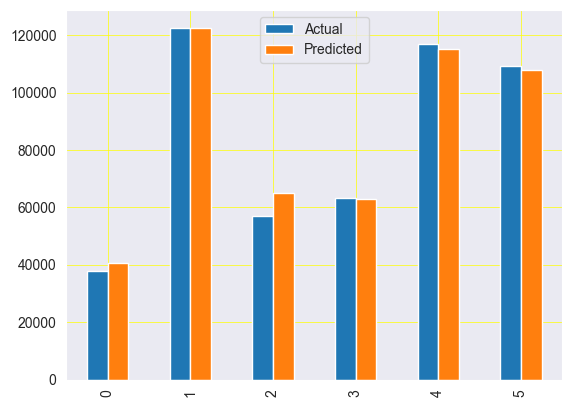

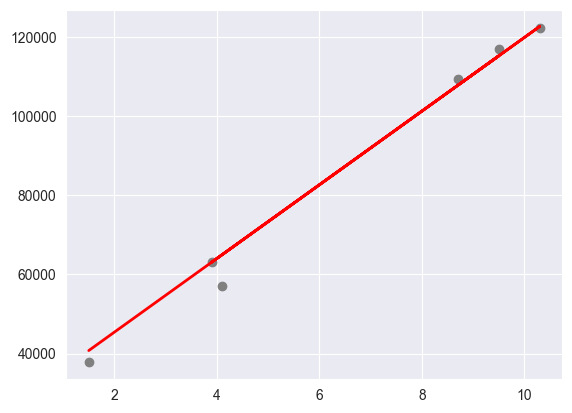

In [5]:
from pandas import read_csv, DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dt = read_csv("Salary_Data.csv")

dataset = DataFrame(dt)

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label="Данные работников")
plt.xlabel("Опыт")
plt.ylabel("Зарплата")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)

df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

## 4
    Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

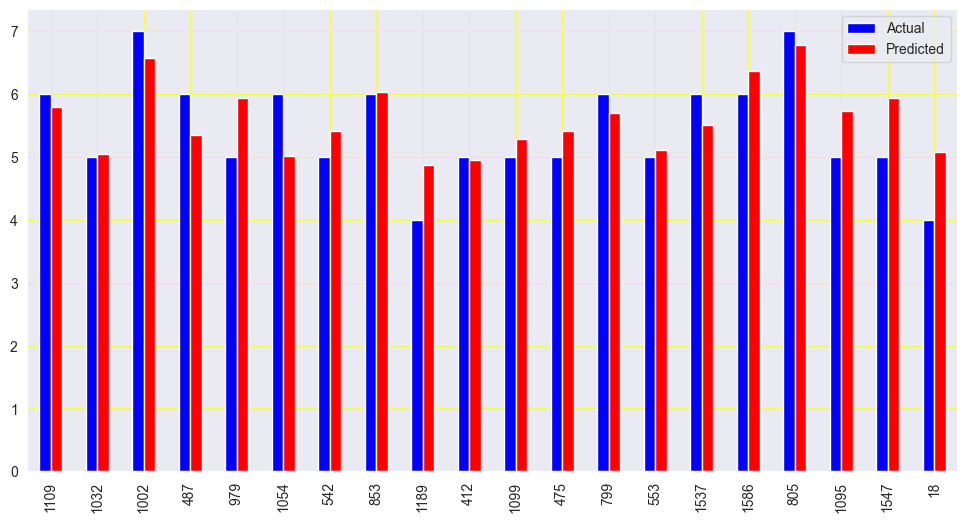

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
dt = read_csv("winequality-red.csv")

df1 = dt[['quality']].copy()
df2 = dt[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].copy()

df1.rename(columns={'quality':'y'}, inplace=True)
df2.rename(columns={'fixed acidity':'x1', 'volatile acidity': 'x2','citric acid': 'x3', 'residual sugar': 'x4','chlorides' : 'x5', 'free sulfur dioxide': 'x6', 'total sulfur dioxide': 'x7', 'density': 'x8', 'pH': 'x9', 'sulphates': 'x10', 'alcohol': 'x11'  }, inplace=True)
frames = [df1, df2]

dataset = pd.concat([df1, df2], axis=1, join='inner')

x = dataset[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]

y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])

y_pred = regressor.predict(x_test)

df = DataFrame({'Actual': y_test, 'Predicted': y_pred})


df_sample = df.head(20)

df_sample.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
# df.plot(kind='bar', figsize=(12, 6))
plt.grid(which='major', linestyle = '-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle = ':', linewidth='0.5', color='green')

plt.show()